In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [2]:
train_dir = 'data/train'
val_dir = 'data/test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=24,
    color_mode="grayscale",
    class_mode='categorical',
)


Found 3936 images belonging to 41 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=6,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 984 images belonging to 41 classes.


In [7]:
model = Sequential()


In [8]:
model.add(Conv2D(32, (3, 3),
          activation='relu', input_shape=(128, 128, 1)))



In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [10]:
model.add(Conv2D(32, (3, 3), padding="same",
          activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [11]:
model.add(Flatten())


In [12]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(64, activation='relu'))
model.add(Dense(41, activation='softmax'))

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [21]:
history = model.fit(train_generator,
                    epochs=75,
                    validation_data=test_generator)


Epoch 1/75
164/164 [==============================] - 79s 456ms/step - loss: 3.5249 - accuracy: 0.0620 - val_loss: 2.2224 - val_accuracy: 0.4106
Epoch 2/75
164/164 [==============================] - 69s 420ms/step - loss: 2.1539 - accuracy: 0.3039 - val_loss: 1.0629 - val_accuracy: 0.6382
Epoch 3/75
164/164 [==============================] - 66s 403ms/step - loss: 1.4722 - accuracy: 0.4820 - val_loss: 0.7147 - val_accuracy: 0.7967
Epoch 4/75
164/164 [==============================] - 71s 435ms/step - loss: 1.1635 - accuracy: 0.5823 - val_loss: 0.4124 - val_accuracy: 0.8984
Epoch 5/75
164/164 [==============================] - 67s 409ms/step - loss: 0.9878 - accuracy: 0.6428 - val_loss: 0.3469 - val_accuracy: 0.9065
Epoch 6/75
164/164 [==============================] - 70s 428ms/step - loss: 0.8554 - accuracy: 0.6878 - val_loss: 0.2779 - val_accuracy: 0.9024
Epoch 7/75
164/164 [==============================] - 73s 444ms/step - loss: 0.7695 - accuracy: 0.7274 - val_loss: 0.1893 - val_ac

In [22]:
model_json = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model_updated.h5')
print('Weights saved')
model.save('model.h5')


Model Saved
Weights saved


In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Visualizing loss

Text(0.5, 1.0, 'Loss Curves')

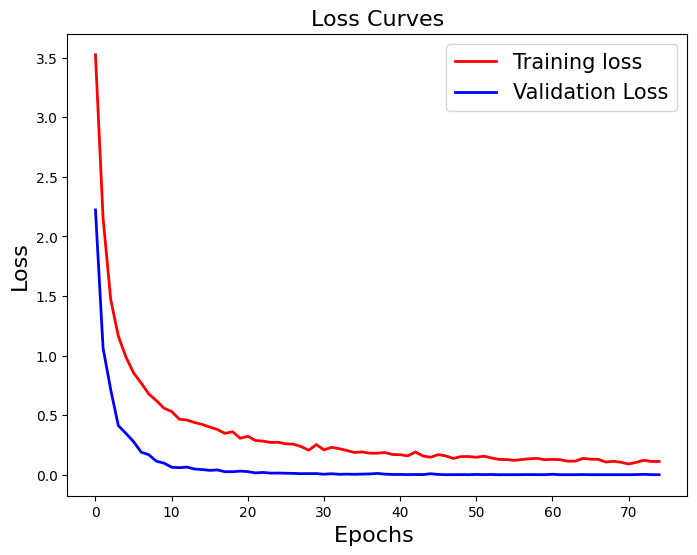

In [24]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=2.0)
plt.plot(history.history['val_loss'], 'b', linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)


Visualizing accuracy

Text(0.5, 1.0, 'Accuracy Curves')

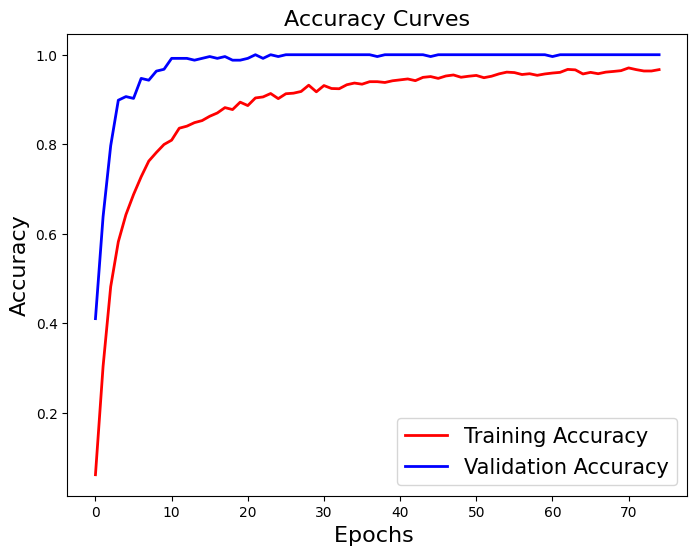

In [25]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
